# Estudo Dirigido


Os ítens do enunciado serão analisados e respondidos previamente neste notebook. O relatório final contendo os resultados destas analises encontra-se no diretório `report`. Os gráficos gerados aqui são mantidos no diretório `report/images`.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ondas-no-Tokamak-TCABR" data-toc-modified-id="Ondas-no-Tokamak-TCABR-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ondas no Tokamak TCABR</a></span><ul class="toc-item"><li><span><a href="#Resolução-Temporal-(frequência-de-aquisição)" data-toc-modified-id="Resolução-Temporal-(frequência-de-aquisição)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resolução Temporal (frequência de aquisição)</a></span></li><li><span><a href="#Representação-gráfica-das-séries-temporais-referentes-a-cada-sonda" data-toc-modified-id="Representação-gráfica-das-séries-temporais-referentes-a-cada-sonda-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Representação gráfica das séries temporais referentes a cada sonda</a></span></li><li><span><a href="#Valores-Médios-do-Fluxo-Magnético" data-toc-modified-id="Valores-Médios-do-Fluxo-Magnético-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Valores Médios do Fluxo Magnético</a></span></li><li><span><a href="#Correlação-Cruzada" data-toc-modified-id="Correlação-Cruzada-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Correlação Cruzada</a></span></li><li><span><a href="#Interpretação-da-variação-da-correlação-cruzada-em-função-da-defasagem-n" data-toc-modified-id="Interpretação-da-variação-da-correlação-cruzada-em-função-da-defasagem-n-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Interpretação da variação da correlação cruzada em função da defasagem n</a></span></li></ul></li></ul></div>

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.signal import correlate

%run get_data.py

data_path = "data/"

dtypes = dict(
    time=float,
    probe_1=float,
    probe_2=float
)

helimak = pd.read_csv(data_path + "HELIMAK.csv", dtype=dtypes).dropna()

## Ondas no Tokamak TCABR


In [88]:
# Load data from csv file
tcabr = pd.read_csv(data_path + "TCABR.csv", dtype=dtypes).dropna()

# Set TCABR parameters
r = 0.195


### Resolução Temporal (frequência de aquisição)

- Corresponde ao número de acquisições por unidade de tempo (segundos)

In [89]:
frequency = tcabr['time'].count() / (tcabr['time'].max() * 0.001)

print(frequency)

250000.0


por tanto, a resolução temporal das sondas é de 250kHz.

### Representação gráfica das séries temporais referentes a cada sonda

- Janela de tempo de 1ms utilizada, entre t=3.0s e t=4.0s

<Figure size 1440x360 with 0 Axes>

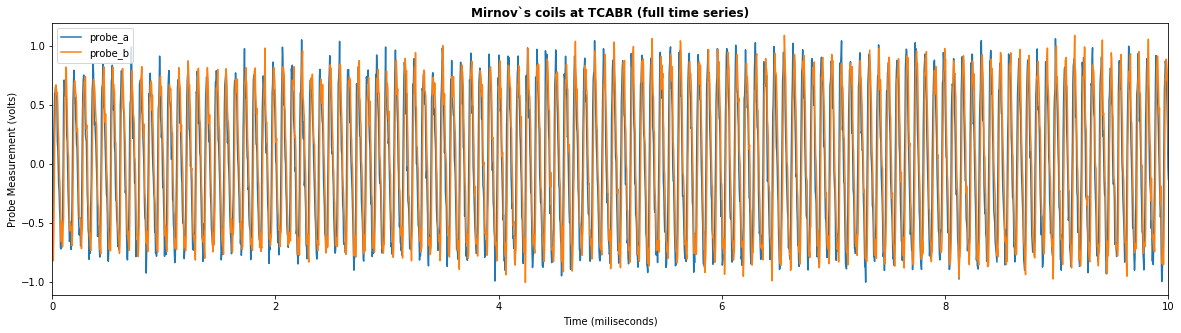

In [90]:
plt.rcParams["figure.figsize"] = (20,5)

fig = plt.figure()
tcabr.plot.line(x='time', y=['probe_a', 'probe_b'])
plt.ylabel("Probe Measurement (volts)")
plt.xlabel("Time (miliseconds)")
plt.title("Mirnov`s coils at TCABR (full time series)", fontweight='bold')
plt.savefig('report/images/tcabr_probes_a_b_time_series_all.png', bbox_inches='tight')



<Figure size 1440x360 with 0 Axes>

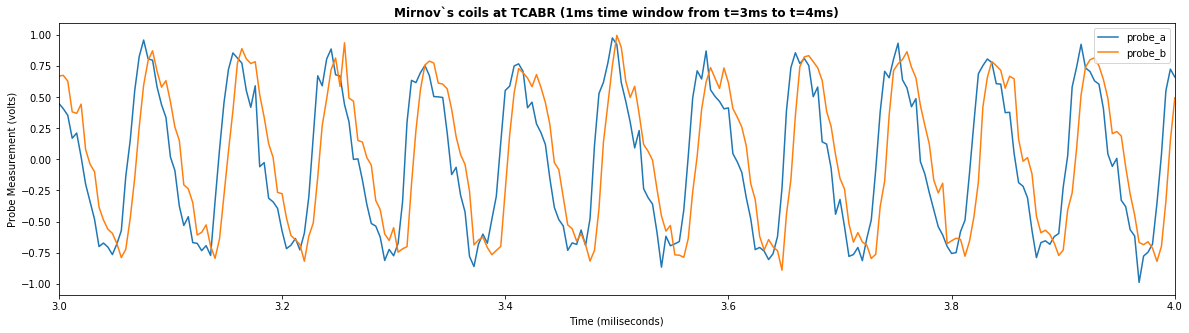

In [123]:
plt.rcParams["figure.figsize"] = (20,5)

fig = plt.figure()
tcabr[(tcabr['time'] >= 3) & (tcabr['time'] <= 4)].plot.line(x='time', y=['probe_a', 'probe_b'])
plt.ylabel("Probe Measurement (volts)")
plt.xlabel("Time (miliseconds)")
plt.title("Mirnov`s coils at TCABR (1ms time window from t=3ms to t=4ms)", fontweight='bold')
plt.savefig('report/images/tcabr_probes_a_b_time_series_1ms.png', bbox_inches='tight')


### Valores Médios do Fluxo Magnético

Cálculo dos valores médios do fluxo magnético medido nas bobinas, juntamente do desvio quadrático médio. 

**Nota:** Não está claro se os sinais medidos nas sondas correspondem a potencial elétrico ou ao fluxo magnético. O exercício foi feito considerando que já é o fluxo magnético calculado. 

#### Valores Médios

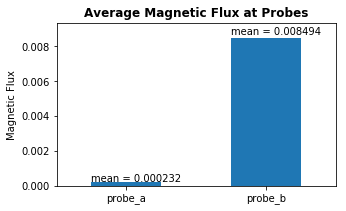

In [148]:
plt.rcParams["figure.figsize"] = (5,3)
fig = plt.figure()
ax = tcabr[['probe_a', 'probe_b']].mean().plot.bar()
plt.title("Average Magnetic Flux at Probes", fontweight='bold')
plt.ylabel("Magnetic Flux")
plt.ylim([0, max(tcabr['probe_a'].mean(), tcabr['probe_b'].mean()) * 1.1])
plt.xticks(rotation=0)
plt.savefig('report/images/average_flux_probes_a_b.png', bbox_inches='tight')

for p in ax.patches:
    ax.annotate("mean = " + str(round(p.get_height(), 6)), (p.get_x() * 1, p.get_height() * 1.02))


#### Desvio quadrático médio

Calculo realizado em comparação com a média dos valores para cada sonda.

In [121]:
mse_dataset = tcabr.copy()

mse_dataset['probe_a_mean'] = tcabr['probe_a'].mean()
mse_dataset['probe_b_mean'] = tcabr['probe_b'].mean()

mse_dataset['probe_a_flotation'] = mse_dataset['probe_a'] - mse_dataset['probe_a_mean']
mse_dataset['probe_b_flotation'] = mse_dataset['probe_b'] - mse_dataset['probe_b_mean']

mse_probe_a = np.mean(mse_dataset['probe_a_flotation'].values ** 2) / len(mse_dataset['probe_a_flotation'].values)
mse_probe_b = np.mean(mse_dataset['probe_b_flotation'].values ** 2) / len(mse_dataset['probe_b_flotation'].values)

print("MSE Probe A: {:0.8f} | MSE Probe B: {:0.8f}".format(mse_probe_a, mse_probe_b))

MSE Probe A: 0.00013474 | MSE Probe B: 0.00013412


### Correlação Cruzada

Janela de tempo utilizada: `(t > 3ms) & (t < 5ms)` centrada em `t = 4ms`


In [159]:
cr_dataset = tcabr[(tcabr['time'] > 3) & (tcabr['time'] < 5)].copy()
cr_dataset['cross_correlation']= correlate(
    cr_dataset['probe_a'].values,
    cr_dataset['probe_b'].values,
    mode='same'
)

# Phase difference
cr_dataset['phase_difference'] = cr_dataset['probe_b'] - cr_dataset['probe_a']

<Figure size 1440x360 with 0 Axes>

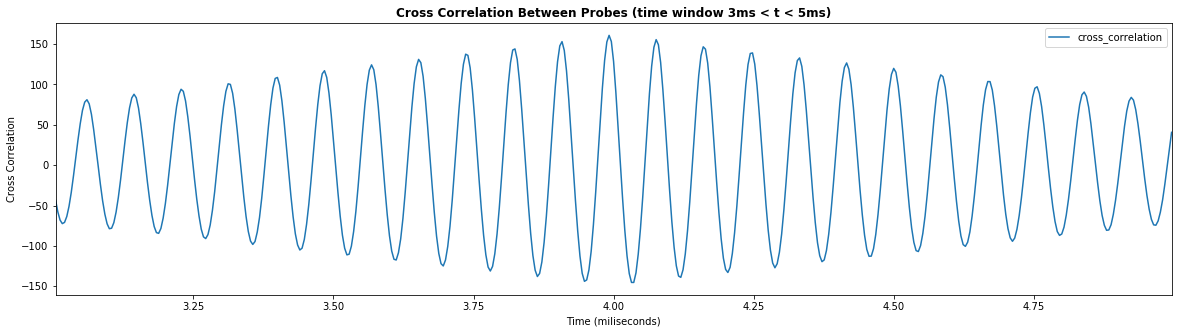

In [160]:
plt.rcParams["figure.figsize"] = (20,5)
fig = plt.figure()
cr_dataset.plot.line(x='time', y='cross_correlation')
plt.title("Cross Correlation Between Probes (time window 3ms < t < 5ms)", fontweight='bold')
plt.ylabel("Cross Correlation")
plt.xlabel("Time (miliseconds)")
plt.savefig('report/images/tcabr_probes_a_b_cross_correlation_3ms_5ms', bbox_inches='tight')


### Interpretação da variação da correlação cruzada em função da defasagem n


